# Train your first neural network: basic classification
via https://www.tensorflow.org/tutorials/keras/basic_classification

- 服(スニーカーとかTシャツとかの)画像の分類
- tf.kerasという高レベルAPIを使用する
  - tf.kerasの説明 [Keras  |  TensorFlow](https://www.tensorflow.org/guide/keras)

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


## Import the Fashion MNIST dataset
- 今回使用するデータセットはFashion MNISTというもの
   - 該当の画像を管理しているリポジトリ: [zalandoresearch/fashion-mnist: A MNIST-like fashion product database. Benchmark](https://github.com/zalandoresearch/fashion-mnist)
- 7万点の服のグレースケール画像が10のカテゴリーに分類されている
  - 例
    ![](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)
- MNIST完全互換のデータセット
  - 通常のMNISTより挑戦しがいがある(らしい)
- 今回は7万点のうち6万点をトレーニングデータとして、残り1万点をテストデータとして扱う

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


データセットはNumPy配列として帰ってくる
- train_images, train_labelsはトレーニングデータ
- test_images, test_labelsはテストデータ

imagesは28×28のNumPy配列で各数値は0~255までの256が入っている。labelsは0~9の数字が入っている

クラス分類と数値の対応は下記

|  **Label** | **Class** |
| :--- | :--- |
|  0 | T-shirt/top |
|  1 | Trouser |
|  2 | Pullover |
|  3 | Dress |
|  4 | Coat |
|  5 | Sandal |
|  6 | Shirt |
|  7 | Sneaker |
|  8 | Bag |
|  9 | Ankle boot |

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data
データの様子を見る

トレーニングデータは60000のimagesと各々28 × 28ピクセルを持っている

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

ラベルは0から9

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

テストデータは10000のimagesと各々28 × 28ピクセルを持っている

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## Preprocess the data
ネットワークに食わせる前に前処理をする必要がある

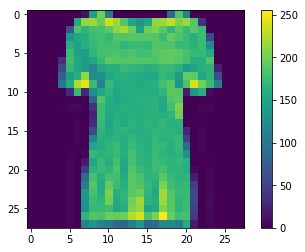

In [9]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)

ここでは255までの数字が入っているが、これを0,1に正規化するために各imagesを255で割る

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

とりま表示してみる

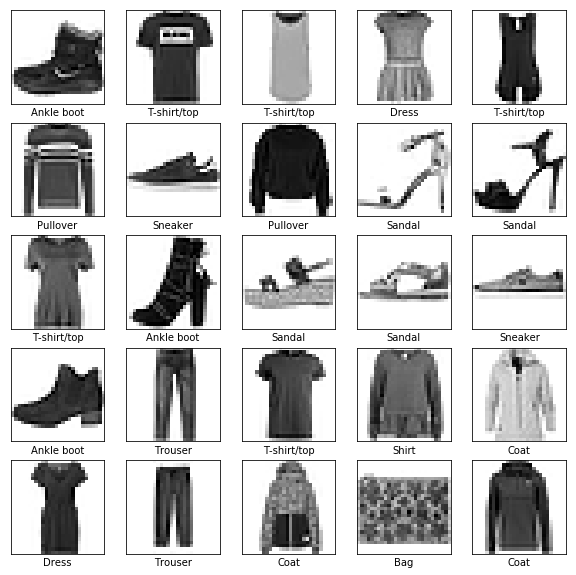

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model
ニューラルネットワークはモデルのレイヤーを設定し、コンパイルする

### Setup the layers
基本的な構成要素は *layer* 

多くのディープラーニングは単純なレイヤーをつなげることで構成されている
- 例: [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


- [tf.keras.layers.Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)
  - 28, 28の二次元配列を28×28の1次元配列に変換する
  - ここでの学習はない
- [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
  - 密に、または完全に連結なニューラルそう
  - 最初のレイヤーは128ノード(ニューロン)が存在し、2つ目のレイヤーは10個のsoftmaxレイヤーを持つ(これは10個の確率として表現され、10個すべての和を取ると1になる)

### Compile the model
トレーニングの前準備としていくつか設定を加える必要がある
- Loss function: モデルの正当性を測るためのもの。正しい方向に"操縦"して小さくなることを期待する。
- Optimizer: データをもとにどのようにモデルを更新するか
- Metrics: トレーニング、テストの段階でモニターするために？使われる。今回は*accuracy* を使用

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model
NNのモデルをトレーニングする際には次のステップを取る
1. モデルにデータを流す
   - train_imagesと train_labels
2. モデルがimagesとlabelsの関係を学習する
3. テストデータからから予測をする
   - test_imagesを予測させ、test_labesで検証する

モデルの学習をさせるためにはmodel.fitを用いる

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 152us/step - loss: 0.5029 - acc: 0.8230
Epoch 2/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.3774 - acc: 0.8652
Epoch 3/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.3386 - acc: 0.8781
Epoch 4/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.3135 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 9s 147us/step - loss: 0.2950 - acc: 0.8912


## Evaluate accuracy
テストデータと比較する。トレーニングデータセットより正確性は劣る。その差は過学習からくるもので、(トレーニングデータ以外の)新しいデータに対してはモデルはあまり良くない性能を発揮する

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 47us/step
Test accuracy: 0.8739


## Make predictions
モデルを使っていくつかのイメージを予測させることにする。

In [16]:
predictions = model.predict(test_images)
np.argmax(predictions[0])

9

In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

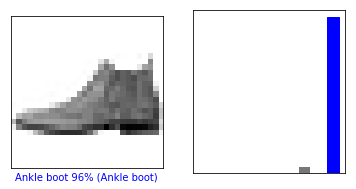

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

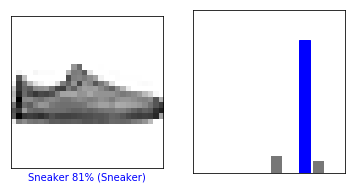

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

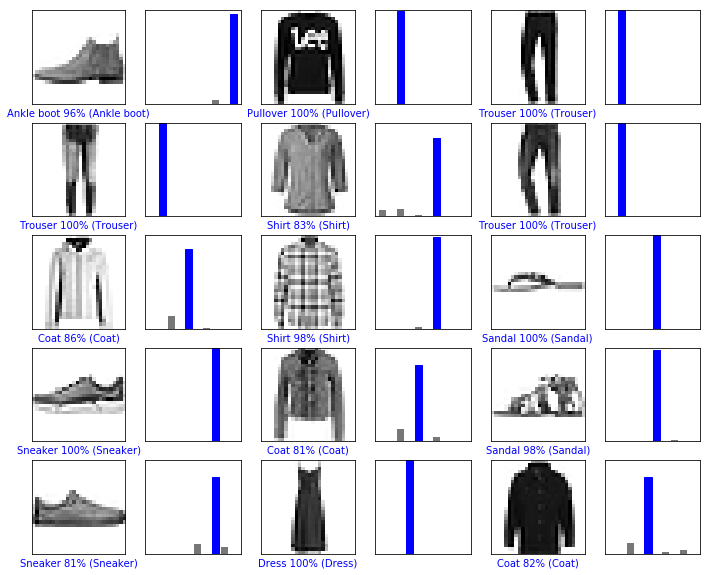

In [20]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

以下省略(一つの画像に対する予測・・・・？)